### **MAPS OF ENSEMBLE MEANS** [^](00_recreate-plot-explorer.ipynb)

In [1]:
from plotting_methods import *
from indices import var_cv, lc

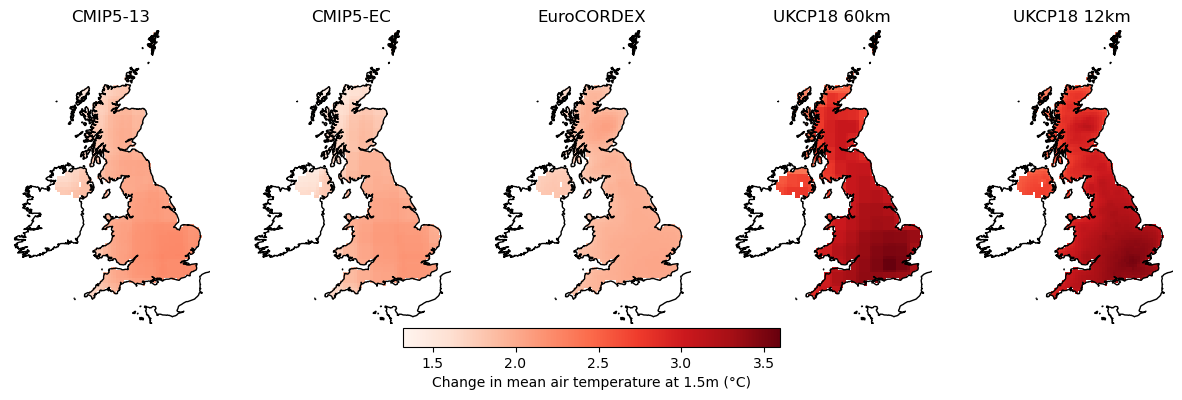

In [2]:
# load netcdf containing map data
da = xr.open_dataset("example_data/tas_12km_ens-mean-maps_20491201-20791130_annual.nc")

# select first variable in dataset
da = da[list(da.data_vars)[0]] 

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# create empty subplots with appropriate projection, extent & coastlines
fig, axs = plt.subplots(ncols = len(da.ensemble), figsize = (len(da.ensemble) * 3,5), sharex = True, sharey = True, 
                        subplot_kw = { "projection" : crs_osgb}, dpi= 100, facecolor='w', edgecolor='k')

for axz in fig.axes:
    axz.set_extent((-2e5, 7e5, -1e5, 12.2e5), crs = crs_osgb)
    axz.set_axis_off()
    axz.coastlines(zorder = 99)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# If observations available, split out & plot separately

if "obs" in da.ensemble:
    # split out observations & plot separately, using unique colourbar
    o = 1
    obs = da.sel(ensemble = "obs")
    da = da.sel(ensemble = [ens for ens in da.ensemble.values if not ens == "obs"])
    obs.plot(ax = axs[0], **vrange(obs), cmap = fix_cmap(var_cv[da.name]["cmap"], **vrange(obs)), 
             cbar_kwargs = {"ax" : axs[:1], "location" : "bottom", "pad" : 0.02, "fraction" : 0.05, "label" : var_cv[da.name]["plot_label"]})
    axs[0].set_title("HadUK-Grid (observed)")
else:
    o = 0
    if da.period == "19801201-20101130":
        cbar_label = var_cv[da.name]["plot_label"]
    else:
        cbar_label = "Change in "+lc(var_cv[da.name]["plot_label"])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# plot the ensemble means

# set limits for colour scale to be used for ensemble means
vlims = vrange(da)

# draw ensemble mean maps
for i in range(len(da.ensemble)):
    cbar = da.isel(ensemble = i).plot(ax = axs[i+o], **vlims, cmap = fix_cmap(var_cv[da.name]["cmap"], **vlims), add_colorbar = False)
    axs[i+o].set_title(da.ensemble.values[i])
    
# add colourbar used for ensemble means
plt.colorbar(cbar, ax = axs[o:], location = "bottom", fraction = 0.05, pad = 0.01, label = cbar_label)